In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("M:\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [38]:
df.shape

(200, 5)

In [39]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [40]:
df.drop("CustomerID",axis=1,inplace=True) 

In [41]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [43]:
print("Missing values:") 
df.isnull().sum() 

Missing values:


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [28]:
df = pd.get_dummies(df, columns=['Genre'])
print(df.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0           1   19                  15                      39         False   
1           2   21                  15                      81         False   
2           3   20                  16                       6          True   
3           4   23                  16                      77          True   
4           5   31                  17                      40          True   

   Genre_Male  
0        True  
1        True  
2       False  
3       False  
4       False  


In [29]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109,-0.058109
Genre_Female,-0.057400,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Genre_Male,0.057400,0.060867,0.056410,-0.058109,-1.000000,1.000000


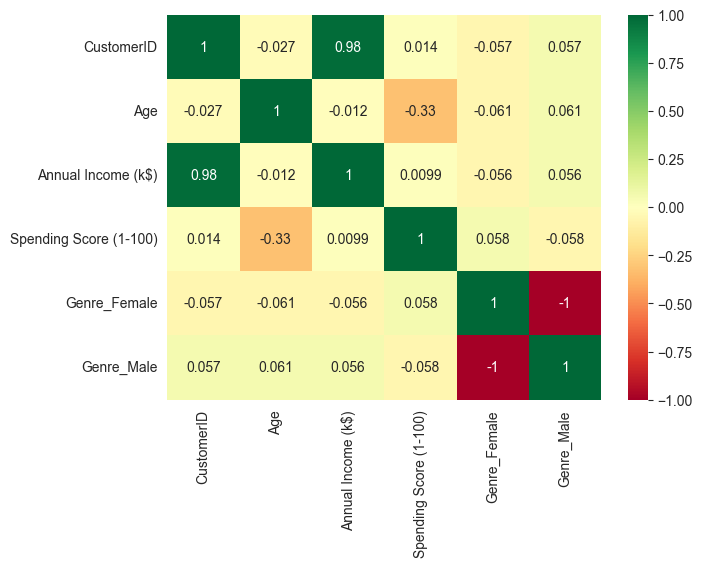

In [30]:
plt.figure(figsize=(7,5)) 
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn') 
plt.show()

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

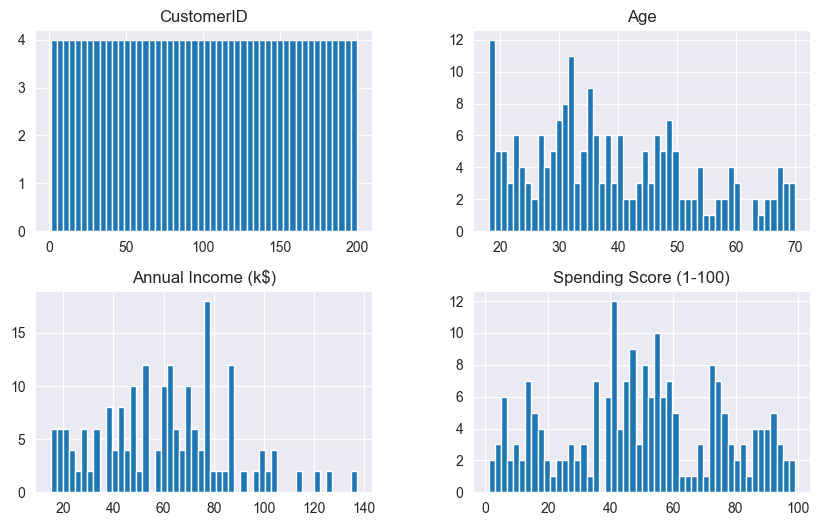

In [31]:
df.hist(bins = 50,figsize = (10,6))

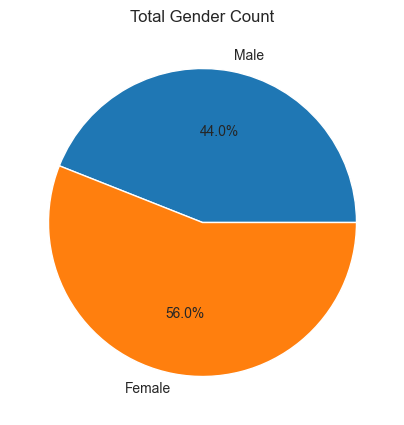

In [32]:

df[['Genre_Male', 'Genre_Female']].sum().plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', figsize=(5,5))
plt.title("Total Gender Count")
plt.show()

In [33]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Female', 'Genre_Male'],
      dtype='object')

In [34]:
df['Genre'] = df['Genre_encoded'].map({0: 'Female', 1: 'Male'})
sns.pairplot(df, hue="Genre")
plt.show()

KeyError: 'Genre_encoded'

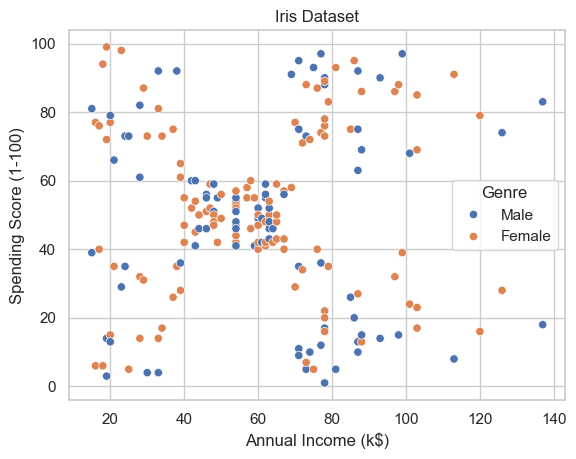

In [30]:
sns.set(style = 'whitegrid') 
sns.scatterplot(y = 'Spending Score (1-100)',x ='Annual Income (k$)',data = df,hue= "Genre"); 
plt.title('Iris Dataset') 
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics  
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])

In [32]:
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_encoded,Genre_Female,Genre_Male,Genre
0,19,15,39,1,False,True,1
1,21,15,81,1,False,True,1
2,20,16,6,0,True,False,0
3,23,16,77,0,True,False,0
4,31,17,40,0,True,False,0
...,...,...,...,...,...,...,...
195,35,120,79,0,True,False,0
196,45,126,28,0,True,False,0
197,32,126,74,1,False,True,1
198,32,137,18,1,False,True,1


In [33]:
data = df.copy() 
x = data.iloc[:,[2,3]] 

In [34]:
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  
    print('k:',i ,"-> wcss:",kmeans.inertia_)

k: 1 -> wcss: 132753.28000000003
k: 2 -> wcss: 45905.01305800182
k: 3 -> wcss: 13978.407788699462
k: 4 -> wcss: 8915.835768282494
k: 5 -> wcss: 5192.791390382318
k: 6 -> wcss: 3508.053055597277
k: 7 -> wcss: 3010.624100440763
k: 8 -> wcss: 2043.8120801112036
k: 9 -> wcss: 1614.6065672250456
k: 10 -> wcss: 1430.3432880826902


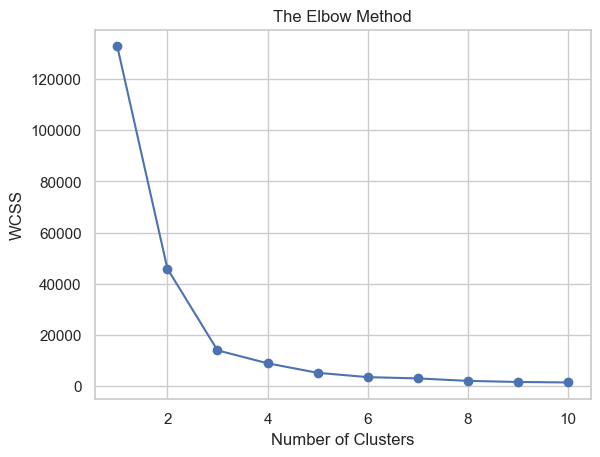

In [35]:
plt.plot(range(1,11),wcss,marker='o') 
plt.title('The Elbow Method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS') 
plt.show() 

In [36]:
km1=KMeans(n_clusters=5)
km1.fit(data)
y=km1.predict(data)
data["label"] = y
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_encoded,Genre_Female,Genre_Male,Genre,label
0,19,15,39,1,False,True,1,3
1,21,15,81,1,False,True,1,4
2,20,16,6,0,True,False,0,3
3,23,16,77,0,True,False,0,4
4,31,17,40,0,True,False,0,3


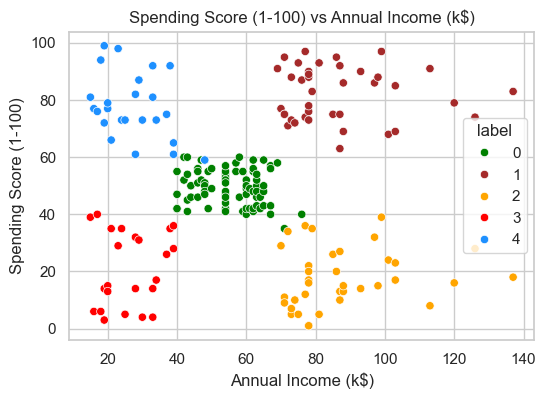

In [37]:
plt.figure(figsize=(6,4)) 
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",   
                 palette=['green','brown','orange','red','dodgerblue'],data = data ) 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')  
plt.title('Spending Score (1-100) vs Annual Income (k$)') 
plt.show()

In [38]:
X=data.iloc[:,:4] 
y=data.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Shape of train Test Split 
print(X_train.shape,y_train.shape) 
print(X_test.shape,y_test.shape)

(160, 4) (160,)
(40, 4) (40,)


In [40]:
from sklearn.cluster import KMeans 
km=KMeans(n_clusters=5) 
km.fit(X_train) 
#predicting the target value from the model for the samples 
y_train_km = km.predict(X_train) 
y_test_km = km.predict(X_test) 

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score 
 
acc_train_gmm = adjusted_rand_score(y_train,y_train_km) 
acc_test_gmm = adjusted_rand_score(y_test,y_test_km) 
 
print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm)) 
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

K mean : Accuracy on training Data: 0.983
K mean : Accuracy on test Data: 0.791


In [42]:
data = df.copy() 
data = data.iloc[:,[2,3]] 
data

,Spending Score (1-100),Genre_encoded
0,39,1
1,81,1
2,6,0
3,77,0
4,40,0
...,...,...
195,79,0
196,28,0
197,74,1
198,18,1


In [43]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data = data ); 

ValueError: Could not interpret value `Annual Income (k$)` for `x`. An entry with this name does not appear in `data`.

In [44]:
# Rename the column to a simpler name
data.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"}, inplace=True)

# Now, plot with the new column names
sns.scatterplot(x="Annual_Income", y="Spending_Score", data=data)
plt.show()

ValueError: Could not interpret value `Annual_Income` for `x`. An entry with this name does not appear in `data`.

In [46]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_encoded',
       'Genre_Female', 'Genre_Male', 'Genre'],
      dtype='object')

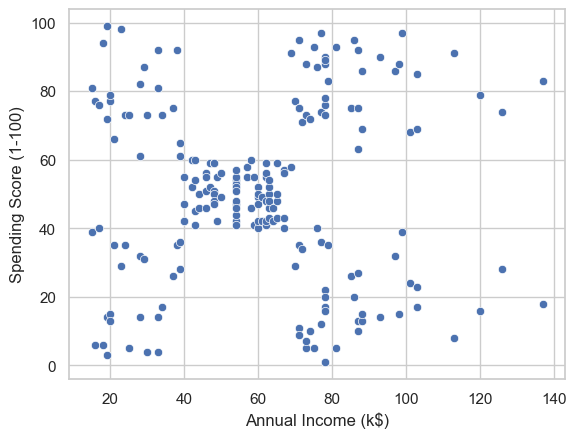

In [50]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data = df );

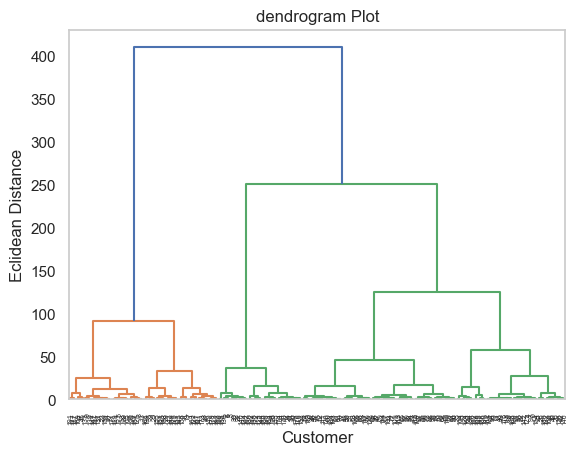

In [51]:
import scipy.cluster.hierarchy as shc 
dendrogram = shc.dendrogram(shc.linkage(data,method="ward")) 
plt.title("dendrogram Plot") 
plt.xlabel("Customer") 
plt.ylabel("Eclidean Distance") 
plt.grid(False) 

In [52]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters=5) 
data["label"] = agc.fit_predict(data) 
data

,Spending_Score,Genre_encoded,label
0,39,1,0
1,81,1,3
2,6,0,2
3,77,0,4
4,40,0,0
...,...,...,...
195,79,0,4
196,28,0,0
197,74,1,4
198,18,1,2


In [54]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",   
                 palette=['green','brown','orange','red','dodgerblue'],data = df ) 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')  
plt.title('Spending Score (1-100) vs Annual Income (k$)') 
plt.show() 

ValueError: Could not interpret value `label` for `hue`. An entry with this name does not appear in `data`.

In [55]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_encoded',
       'Genre_Female', 'Genre_Male', 'Genre'],
      dtype='object')

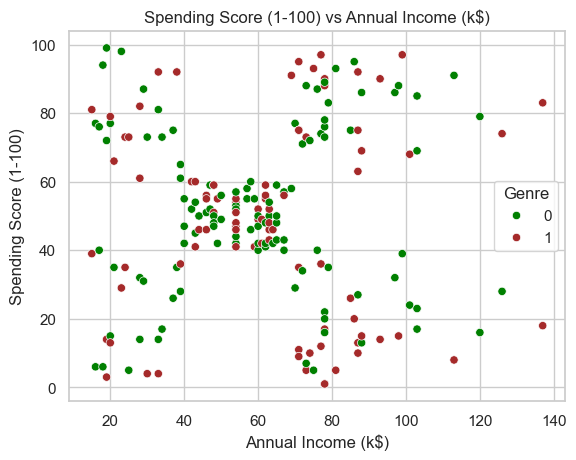

In [56]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre',
                palette=['green', 'brown', 'orange', 'red', 'dodgerblue'], data=df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()
